Привет! Ты теперь находишься на территории код-ревьюеров. У нас тут своя атмосфера и правила:  
1. Меня зовут Алексей Свирин. Я работаю продуктовым аналитиком, поэтому мои комментарии больше ориентированы на визуальную и смысловую часть проекта, которая предназначена для внешних пользователей твоего проекта, и меньше на сам код, его чистоту и оптимизацию.  
2. Общаемся на ты.  
3. Хочешь мне написать — пиши. Только нужно выбрать свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку, но все остальное как в жизни, может быть сложно.  
5. У тебя бесконечное количество ~~жизней~~ попыток для сдачи проекта.  
6. Поехали!  

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>

---

<div class="alert alert-block alert-info">
    

__Комментарий от ревьюера №1__

В проекте нужно поправить А/Б-тест и общий вывод + проверить пользователей в изначальном датасете.
</div>

<div class = "alert alert-info">
<h2>Комментарий студента</h2>
Алексей, приветствую!
    
Спасибо за ревью, новые методы и ссылку на статью о нулевой гипотезе, буду стараться использовать все в дальнейшем. Скорректировал проект и выводы в соответствии с твоими замечаниями.
</div>

<div class="alert alert-block alert-info">
    

__Комментарий от ревьюера №2__

Привет, проект хорошо поправлен, ты правильно сделал А/Б-тест, нашел аномальные значения, построил кумулятивные метрики и сделал правильно приоритезацию в первом разделе. Все графики построены верно и везде есть выводы. Единственно, я бы сократил финальный вывод и меньше расписывал первый этап проекта, указал бы только несколько гипотез для проработки.
</div>

# Приоритизация гипотез и анализ А/В теста интернет-магазина.

## часть. Приоритизация гипотез по увеличению выручки интеренет-магазина.

Задача - приоритизировать 9 гипотез по увеличению выручки интернет-магазина с помощью фреймворков ICE и RICE. Отметить разницу между приоритизацией ICE и RICE.

### Предобработка и исследование данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt

In [2]:
try:
    url='https://drive.google.com/file/d/1aHcXHFIJJ2Qsx4pj46hGDzw0KaD5IhHr/view?usp=sharing'
    path = 
    df_hpt = pd.read_csv('/datasets/hypothesis.csv')
except:
    raise

Импортируем основные библиотеки и прочтем датасет с гипотезами.

In [3]:
df_hpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
df_hpt.columns = map(str.lower, df_hpt.columns)

Для удобства приведем наименования столбцов к строчным буквам.

In [5]:
pd.options.display.max_colwidth = 150 
df_hpt

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__

Чтобы вывести полное название гипотез, можно использовать такой код:  
<code>pd.set_option('display.max_columns', None)  
pd.options.display.max_colwidth = 150  </code>
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2__

👍
</div>

In [6]:
df_hpt['hypothesis'].value_counts()

Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить акцию, дающую скидку на товар в день рождения                                                         1
Запустить собственную службу доставки, что сократит срок доставки заказов               

Столбцы reach, impact, confidence и efforts содержат данные типа int. Столбец hypothesis - в формате object. Изменения типов данных - не требуется. Пропусков в датафрейме нет.

### Приоритизация гипотез.

#### Приоритизация гипотез медотом ICE.

In [7]:
df_hpt['ice'] = ((df_hpt['impact']*df_hpt['confidence'])/df_hpt['efforts']).round(1)

Добавим в датафрейм расчетный столбец с расчетом приоритета с помощью фреймворка ICE.

In [8]:
df_hpt_ice = df_hpt[['hypothesis', 'ice']]
df_hpt_ice.sort_values(by = 'ice', ascending = False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Выведем сокращенный датафрейм df_hpt_ice со столбцами hypothesis и ice, отсортированный по убыванию ICE. Первую позицию занимает гипотеза №8 ,благодаря высокому влиянию на пользователей и уверенности в гипотезе. Но охват пользователей очень мал, 1 по десятибалльной шкале. Гипотеза 0 - вторая в списке, у нее высокое влияние и уверенность и чуть шире охват пользователей, 3 балла. Третья позиция - гипотеза 7, добавление формы подписки на все основные страницы. Показатели impact и confidence у нее чуть ниже, зато охват - 10 баллов. Гипотеза 6 - показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию - в основном подкреплена уверенностью в гипотезе. Гипотеза 2 - добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - отличается высоким охватом (8) и уверенностью (7 баллов), но низким влиянием (3). ICE остальных гипотез - ниже 2 баллов.

#### Приоритизация гипотез медотом RICE.

In [9]:
df_hpt['rice'] = ((df_hpt['reach']*df_hpt['impact']*df_hpt['confidence'])/df_hpt['efforts']).round(1)

Добавим в датафрейм расчетный столбец с расчетом приоритета с помощью фреймворка RICE.

In [10]:
df_hpt_rice = df_hpt[['hypothesis', 'rice']]
df_hpt_rice.sort_values(by = 'rice', ascending = False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Выведем датасет с показателем RICE.

In [11]:
df_hpt_ice = df_hpt_ice.merge(df_hpt_rice)
df_hpt_ice['rating_ice'] = df_hpt_ice['ice'].rank(ascending = 1)
df_hpt_ice['rating_rice'] = df_hpt_ice['rice'].rank(ascending = 1)
df_hpt_ice['rating_summary'] = df_hpt_ice['rating_ice']+df_hpt_ice['rating_rice']

numeric_columns = ['rating_ice',
                   'rating_rice',
                   'rating_summary']
cm = sns.light_palette("green", as_cmap=True)
(df_hpt_ice
.sort_values(by = 'rice', ascending = False)
.style
.background_gradient(cmap=cm, subset=numeric_columns)
)                   

,hypothesis,ice,rice,rating_ice,rating_rice,rating_summary
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112,7,9,16
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56,5,8,13
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,40,8,6.5,14.5
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40,6,6.5,12.5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2,9,5,14
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,9,2,4,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4,4,2.5,6.5
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,4,3,2.5,5.5
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3,1,1,2


<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__

Результаты можно было бы выделить цветом — https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2__

👍
</div>

Объединим датасеты для удобства сравнения показателей. Для наглядности добавим ранг каждого рейтинга (порядковое место в столбце). После ранжирования удобнее выделять сравнительную приоритетность по обоиv показателям.
Для совокупной оценки (не в качестве основного инструмента, просто справочно) добавим столбец с сумарным рейтингом ICE и RICE.
В связи с тем, что способ RICE учитывает больше параметров, предлагается рассматривать его в первую очередь. Трудозатраты - достаточно важный параметр в реальной рабочей ситуации.

По RICE лидирует гипотеза: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Достаточно высокие параметры вкупе со средней сложностью (5 баллов) дают такой показатель. По ICE эта гипотеза занимает 7 место из 9. Вывод - эта гипотеза - первая в рейтинге проверки на основании совокупности показателей даже по суммарному рейтингу).

Следующее место по RICE занимает гипотеза: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". У нее низкий efforts, но и impact тоже равен 3. По ICE это 5 гипотеза из 9. Данная гипотеза также интересна для проверки, т.к. должна прямо влиять на конверсию и средний чек. По суммарному рейтингу это четвертая гипотеза, (но разница между суммарными гипотезами "первой пятерки" невелика). 

Гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" также интересна для проверки, т.к. ICE и RICE сопоставимы, 8 и 6,5.  Все параметры на среднем уровне и выше, но охват пользователей невысок, 3 балла. Ее суммарный рейтинг - на втором месте, 14,5.

Гипотеза "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" идентична по рейтингу rice гипотезе "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", у них одинаковое количество баллов. Но impact этой гипотезы значительно выше, как и совокупный показатель. Ее все-таки рекомендуется проверить перед гипотезой о баннерах.

Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" по rice - на 5 месте, но по ice она  - первая. У нее самый низкий охват, но высокая эффективность. Efforts равен 5, что является средним покзателем. Эта гипотеза также требует проверки.

Следующие три гипотезы если и требуют проверки, то в последнюю очередь по совокупности факторов. Гипотеза "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей" является аутсайдером и вряд ли требует проверки.

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__

В целом раздел сделан хорошо, только несколько странно, что ты коллегам/руководству пишешь номера гипотез в половине случаев, почему не полные названия? Так им не придется искать где гипотезы записаны. Они у них вообще могут быть без номеров и в другой сортировке. У тебя же номера гипотез получены просто после импорта в pandas.

</div>

<div class = "alert alert-info">
<h2>Комментарий студента</h2>
Спасибо за подсказку, скорректировал, добавил только наименования гипотез. Попробовал отформатировать таблицу с гипотезами условным форматированием, буду дальше разбираться с этим замечательным инструментом.
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2__

Супер!)
</div>

## часть. Анализ А/В теста.

### Предобработка и исследование данных.

In [12]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    raise

In [13]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    raise

Прочтем датасеты с заказами и посетителями и запишем их в датафреймы orders и visitors

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
orders.sample(3)

,transactionId,visitorId,date,revenue,group
32,3666913472,2038680547,2019-08-15,1680,B
48,133616433,1215602524,2019-08-16,1250,B
1082,2055901696,2944179391,2019-08-12,6015,B


Выведем информацию о датасете orders и 3 случайных записи датасета. Поле date необходимо привести к типу date. Поле group для экономии ресурсов можно привести к типу category.

In [16]:
orders.query('transactionId.isna()')
orders.query('visitorId.isna()')
orders.query('date.isna()')
orders.query('revenue.isna()')
orders.query('group.isna()')

,transactionId,visitorId,date,revenue,group


Поля датасета не содержат пропусков.

In [17]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

In [18]:
orders['group'].astype('category')

0       B
1       B
2       A
3       B
4       B
       ..
1192    B
1193    A
1194    A
1195    A
1196    B
Name: group, Length: 1197, dtype: category
Categories (2, object): [A, B]

Приведем поле group к типу catrgory.

In [19]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y/%m/%d')

Приведем поле date к формату datetime.

In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
visitors.sample(3)

,date,group,visitors
25,2019-08-26,A,722
38,2019-08-08,B,654
14,2019-08-15,A,628


Выведем информацию о датасете visitors. Поле date небходимо привести к типу datetime.

In [22]:
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y/%m/%d')

In [23]:
visitors.query('date.isna()')
visitors.query('group.isna()')
visitors.query('visitors.isna()')

,date,group,visitors


Поля датасета не содержат пропусков.

Проверим, есть ли в датафрейме orders одновременно присутствующие и в группе А и в группе В покупатели.

In [24]:
usersAuniq = pd.DataFrame((orders[orders['group']=='A'][['visitorId']]).visitorId.unique())
usersBuniq = pd.DataFrame((orders[orders['group']=='B'][['visitorId']]).visitorId.unique())

Запишем для групп А и В датафреймы с уникальными visitorId.

In [25]:
users_double_list = pd.merge(usersAuniq, usersBuniq, how = 'inner')
users_double_list
users_double_list.columns = ['visitorId']

Объединим датафреймы с уникальными ID пользователей с помощью merge с параметром inner, чтобы вывести пересекающиеся значения visitorId. Получилось 57 покупателей. В датафрейме - 1197 записей. Для более точного результата теста предлагается очистить датафрейм orders от этих покупателей.

In [26]:
users_double_list = users_double_list['visitorId'].tolist()

In [27]:
orders = orders[~orders['visitorId'].isin(users_double_list)]

Отфильтруем orders по списку users_double_list. Теперь в датафрейме не осталось записей с покупателями, делавшими покупки одновременно в двух группах.

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__

А есть ли у нас пользователи, которые попали в две группы одновременно?

</div>

<div class = "alert alert-info">
<h2>Комментарий студента</h2>
Скорректировал, пользователи, одновременно попавшие в 2 группы отфильтрованы.
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2__

👍
</div>

### Анализ А/В теста.

#### Анализ кумулятивной выручки по группам.

In [28]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Создадим массив уникальных пар дат и групп, применив метод drop_duplicates(). Запишем результат в датасет datesGroups.

In [29]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Сформируем сводные кумулятивные данные о заказах в разрезе дней. Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups. Вычислим максимальную дату и максимум для группы. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков. Отсортируем результаты по столбцам 'date' и 'group'

In [30]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Агрегируем данные о посетителях интернет-магазина аналогичным образом.

In [31]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

Объединим кумулятивные данные в одной таблице и переименуем столбцы в более понятные названия. 

In [32]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Отфильтруем итоги по группам А и В и запишем в 2 датафрейма.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


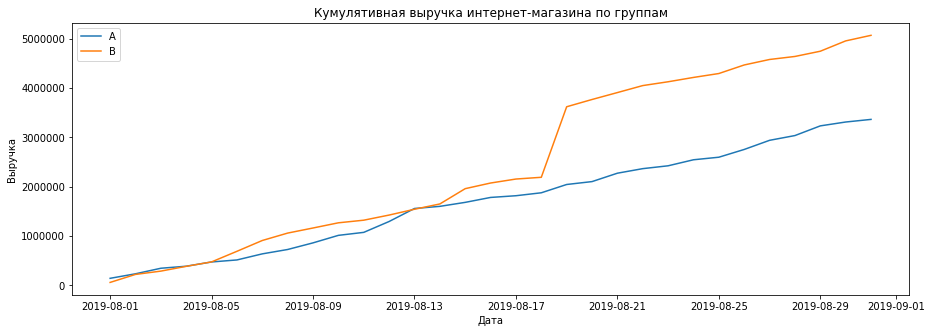

In [33]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'],label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'],label='B')
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.title('Кумулятивная выручка интернет-магазина по группам', fontsize = 12)
plt.legend();

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__

Обрати внимание на предупреждение, его можно убрать, добавив вот эти строки:
    
- from pandas.plotting import register_matplotlib_converters
- register_matplotlib_converters()
    
Сейчас график строится и без них, но в обновленных версиях matplotlib скорее всего без этого не обойтись.
</div>

Построим график кумулятивной выручки. До 17 августа выручка идет почти вровень, незначительно лидирует группа В. Начиная с 17 августа сегмент B значительно опередил сегмент А. Возможно в группе В были сделаны заказы на суммы, превышающие стандартные средние заказы и это повлияло на результат.

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__

На график можно было добавить аннотации для наглядности через такой код:  
<code>plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) </code>
</div>

#### Анализ кумулятивнго среднего чека по группам.

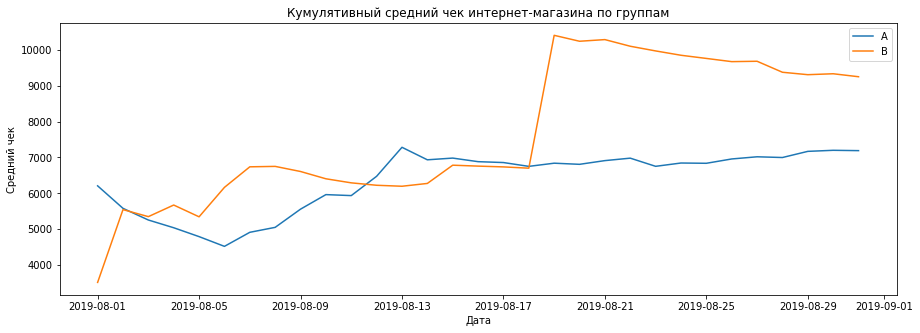

In [34]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.title('Кумулятивный средний чек интернет-магазина по группам', fontsize = 12)
plt.legend();

Построим график кумулятивного среднего чека по группам. Предположения подтверждаются, средний чек группы В c 17 августа значительно выше среднего чека группы А, с большой вероятностью покупателями группы В был сделан один или несколько дорогих заказов, значительно увеличивших средний чек.

#### Анализ относительного изменения кумулятивного среднего чека группы В к группе А.

In [35]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Объединим данные датафреймов А и В.

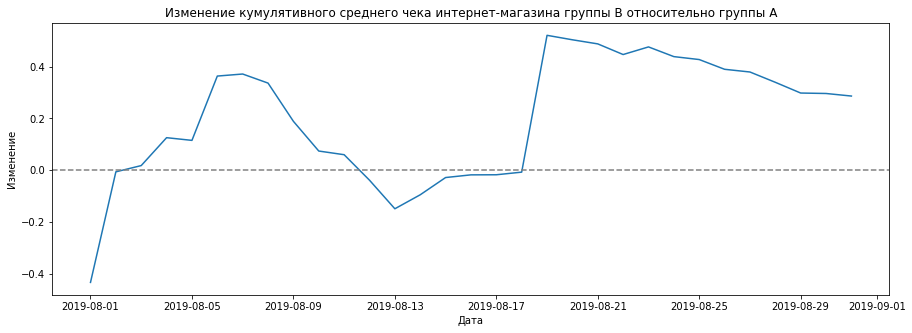

In [36]:
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel("Дата")
plt.ylabel("Изменение")
plt.title('Изменение кумулятивного среднего чека интернет-магазина группы В относительно группы А', fontsize = 12)
plt.axhline(y=0, color='grey', linestyle='--');

Большая часть графика показывает, что средний чек группы В был почти всегда больше среднего чека группы А. Но аномальное увеличение произошло в районе 17 августа, гипотеза о дорогих заказах подтверждается.

#### Анализ кумулятивной конверсии по группам.

In [37]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Добавим столбец с расчетом конверсии в датасет cumulativeData.

In [38]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Разделим датасет на 2, по группам А и В.

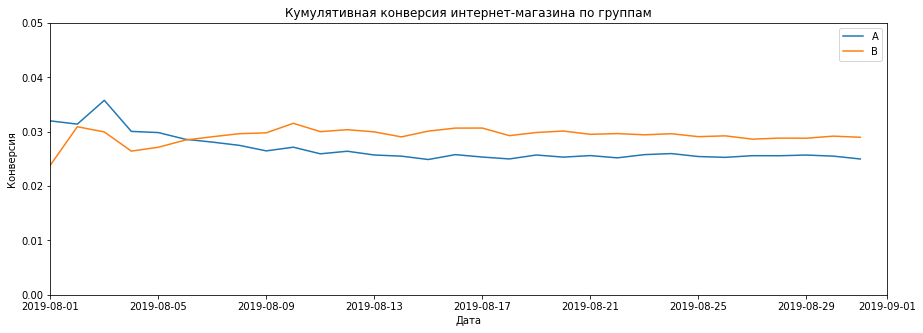

In [39]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'],label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'],label='B')
plt.xlabel("Дата")
plt.ylabel("Конверсия")
plt.title('Кумулятивная конверсия интернет-магазина по группам', fontsize = 12)
plt.legend()
plt.axis(["2019-08-01", '2019-09-01', 0, 0.05]);

Построим график изменения конверсии по группам. Изменим масштаб графика для оценки абсолютного значения колебаний конверсии. Из графика можно сделать вывод, что до 6 августа конверсия группы А была больше конверсии группы В. Затем конверсия группы В стала выше и до конца теста оставалась выше конверсии группы А. Начиная примерно с 18 августа конверсия обеих групп зафиксировалась около определенных значений и почти не менялась.

#### Анализ относительного изменения кумулятивной конверсии группы В к конверсии группы А.

In [40]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Объединим датасеты групп А и В.

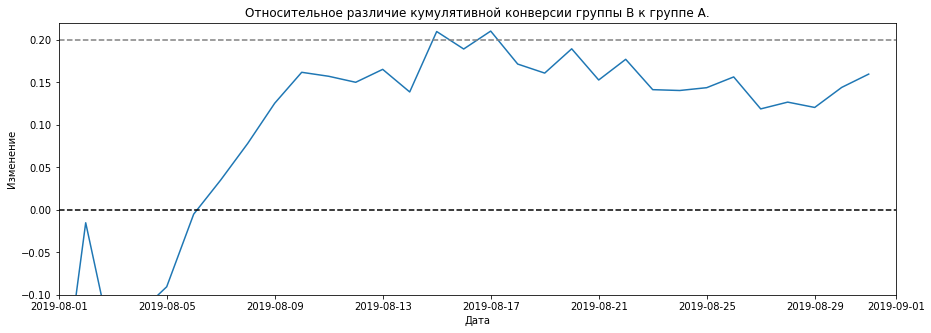

In [41]:
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.xlabel("Дата")
plt.ylabel("Изменение")
plt.title('Относительное различие кумулятивной конверсии группы B к группе A.', fontsize = 12)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.1, 0.22]);

График относительной конверсии показывает, что после 5 августа лидирует группа В. Кратковременная разница в конверсии поднималась до 20%, но после 17 августа начала снижаться и в среднем колеблется около 12%.

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №1__

Задания по кумулятивным метрикам сделаны очень хорошо.
</div>

#### Анализ количества заказов по пользователям.

In [42]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

Найдем число заказов в разрезе пользователей. Применим метод drop к группе, выручке и дате, сгруппируем результат по пользователям. 

In [43]:
x_values = pd.Series(range(0, len(ordersByUsers)))

Сформируем столбец с условными номерами наблюдений.

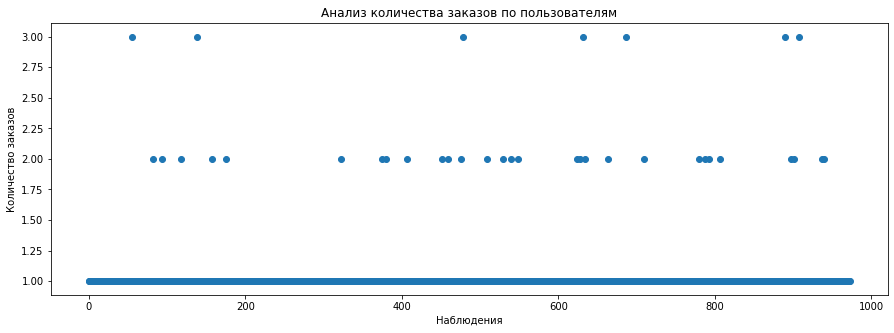

In [44]:
plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.xlabel("Наблюдения")
plt.ylabel("Количество заказов")
plt.title('Анализ количества заказов по пользователям', fontsize = 12);

Точечная диаграмма показывает, что преимущественно пользователи делают 1 заказ. Пользователей, делающих заказ 2 раза - значительно меньше.

#### Выбор границы для определения аномальных пользователей.

In [45]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Посчитаем 95 и 99 перцентиль количества заказов. Не более 1% пользователей совершили 2 заказа.

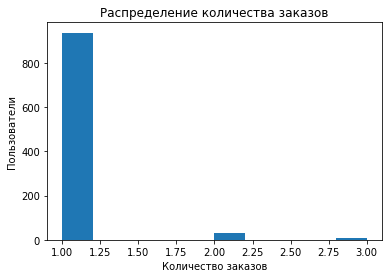

In [46]:
plt.hist(ordersByUsers['orders'])
plt.xlabel("Количество заказов")
plt.ylabel("Пользователи")
plt.title('Распределение количества заказов', fontsize = 12);

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__

Не забывай оформлять и такие графики.
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2__

👍
</div>

Проанализируем распределение количества заказов. Исходя из расчета 95 и 99 перцентиля и гистограммы предлагается считать аномальным количество заказов более 2.

#### Распределение заказов  по стоимости.

In [47]:
x_values_rev = pd.Series(range(0, len(orders['revenue'])))

Сформируем столбец с условными номерами наблюдений.

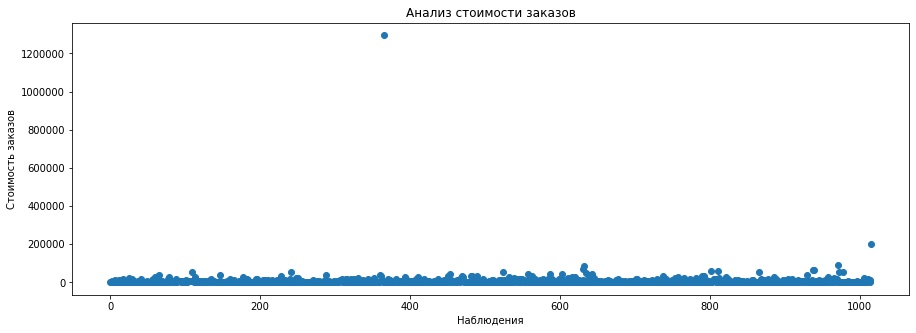

In [48]:
plt.figure(figsize=(15,5))
plt.scatter(x_values_rev, orders['revenue'])
plt.xlabel("Наблюдения")
plt.ylabel("Стоимость заказов")
plt.title('Анализ стоимости заказов', fontsize = 12);

Распределение выглядит достаточно ровно, но из-за вброса свыше 1 200 000 сложно оценить более детально распределение в районе 60-80 тыс. Отфильтруем датасет от явно аномальных значений (свыше 200 тыс) и посмотрим на распределение.   

In [49]:
clr_orders = orders[(orders['revenue'])< 200000]

In [50]:
x_values_rev_clr = pd.Series(range(0, len(clr_orders['revenue'])))

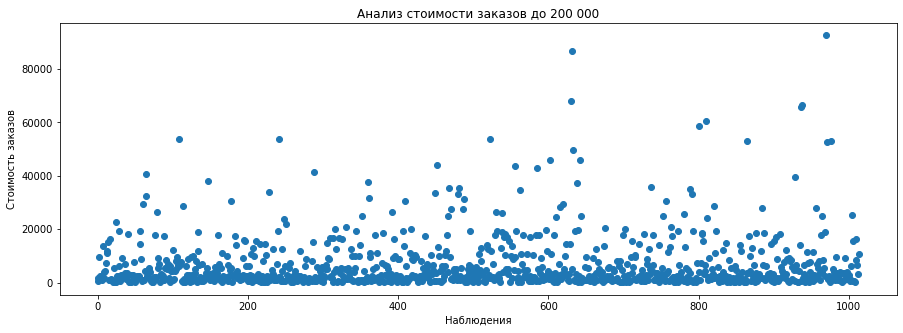

In [51]:
plt.figure(figsize=(15,5))
plt.scatter(x_values_rev_clr, clr_orders['revenue'])
plt.xlabel("Наблюдения")
plt.ylabel("Стоимость заказов")
plt.title('Анализ стоимости заказов до 200 000', fontsize = 12);

Визуально граница "аномальности" проходит где-то в районе 40 тыс. за заказ. Но более точно можно сказать только после расчета 95 и 99 перцентиля стоимости заказов.

#### Выбор границы для определения аномальных заказов.

In [52]:
print(np.percentile(clr_orders['revenue'], [95, 99]))

[26550. 52900.]


In [53]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Посчитаем 95 и 99 перцентиль стоимости заказов. Интересно будет сделать это для очищенного и изначального датасетов. Наличие вбросов увеличивает стоимость среднего заказа для 5% пользователей на 235 условных единиц. Для 1% пользователей разрыв больше - порядка 1000 условных единиц.
Предлагается считать границей аномального заказа 52900 условных единиц.

#### Статистическая значимость различий в конверсии между группами А и В по неочищенным данным.

In [54]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

Выделим в отдельный датасет группу посетителей А. Переименуем столбец visitors в visitorsPerDateA.

In [55]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

Сформируем сводные кумулятивные данные о посещениях в разрезе дней. Получим строки таблицы visitors, дата которых меньше или равна дате элемента из visitorsADaily. Вычислим максимальную дату и кумулятивную сумму пользователей для группы. Дадим новые наименования столбцу visitorsCummulativeA.

In [56]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Аналогичные действия проведем для датасета группы В.

In [57]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

Сформируем сводные данные c количеством заказов и выручкой на каждую дату для группы А.

In [58]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]


Сформируем датасет с теми же показателями, но с накоплениями для группы А.

In [59]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

Сформируем сводные данные c количеством заказов и выручкой на каждую дату для группы В.

In [60]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Сформируем кумулятивные данные для группы В.

In [61]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.sample(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
12,2019-08-13,14,263638,20,117691,214,1558426,249,1542928,748,769,8323,8310
19,2019-08-20,10,58679,20,147274,309,2103613,368,3768059,575,560,12204,12218
8,2019-08-09,11,134237,19,103166,155,861456,176,1162961,617,610,5856,5908


Объединим все датасеты по дате.

In [62]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

Посчитаем количество заказов для пользователей, которые заказывали хотя бы 1 раз в группе А .

In [63]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Аналогично сделаем для группы В.

In [64]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')] 
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

Объявим переменную sampleA, в которой пользователям будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Заказы - это список с количеством заказов для каждого из пользователей, нули - их количество будет равно разнице между суммой посетителей и количеством записей о заказах.

In [65]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

Сформируем аналогичный датасет для группы В.

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__

Нужно сформулировать гипотезы перед каждым тестом, иначе что мы проверяем? Примерно так:  
1. Нулевая гипотеза: ...  
2. Обратная гипотеза: ...  
    
Так сторонний наблюдатель поймет что ты проверяешь.
    
А вот в [этой статье](https://ru.qwe.wiki/wiki/Null_hypothesis) можно почитать в целом о формулировании гипотез и как всё это дело началось)

</div>

<div class = "alert alert-info">
<h2>Комментарий студента</h2>
Скорректировал, добавил формулировки гипотез. Большое спасибо за ссылку на статью, очень подробно и понятно написано о проверке гипотез.
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2__

👍
</div>

Проверим гипотезу о различии между конверсиями групп А и В по "сырым" данным:


1.Нулевая гипотеза: между конверсиями групп А и В нет статистически значимых различий

2.Обратная гипотеза: между конверсиями групп А и В есть статистически значимое различие

In [66]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

0.011


Посчитаем статистическую значимость по тесту Манна-Уитни. p-value больше 0,05. Примем, что по сырым данным нулевую гипотезу не отвергаем, предполагаем, что нет статистически значимых различий между конверсиями групп А и В.

In [67]:
print("{0:.1%}".format(sampleB.mean() / sampleA.mean() - 1))

16.0%


Относительный выигрыш группы В в части конверсии по неочищенным данным равен 16%.

#### Статистическая значимость различий среднего чека между группами А и В по неочищенным данным.

Проверим гипотезу о различии между средним чеком групп А и В по "сырым" данным:


1.Нулевая гипотеза: между средним чеком групп А и В нет статистически значимых различий

2.Обратная гипотеза: между средним чеком групп А и В есть статистически значимое различие

In [68]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))

0.829


Найдём относительные различия в среднем чеке между группами. P-value значительно больше 0,05, нулевая гипотеза о том, что в среднем чеке групп А и В нет различий подтверждается.

In [69]:
print('{0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

28.7%


Средний чек группы В по неочищенным данным больше среднего чека группы А на 28,7%

#### Статистическая значимость различий в конверсии между группами А и В по очищенным данным.

In [70]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

Сформируем датафрейм с количеством заказов больше 2 на пользователя.

In [71]:
usersWithExpensiveOrders = orders[orders['revenue'] > 52900]['visitorId']

Запишем в датафрейм usersWithExpensiveOrders id пользователей с суммой заказа свыше 56745 условных единиц.

In [72]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Объединим датафреймы с id пользователей.

In [73]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Сохраним в датасете sampleAFiltered очищенные данные о заказах группы А без аномальных пользователей.

In [74]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Аналогично запишем датасет для группы В.

Проверим гипотезу о различии между конверсиями групп А и В по очищенным от вбросов данным:


1.Нулевая гипотеза: между конверсиями групп А и В нет статистически значимых различий

2.Обратная гипотеза: между конверсиями групп А и В есть статистически значимое различие

In [75]:
print('{0:.4f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))

0.0063


P-value меньше 0,05. Отвергаем нулевую гипотезу, различия в конверсии между группами есть.

In [76]:
print('{0:.1%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

19.2%


Очищенные данные показывают большую разницу в конверсии меджу группами, чем неочищенные.

#### Статистическая значимость различий среднего чека между группами А и В по очищенным данным.

Проверим гипотезу о различии между средним чеком групп А и В по очищенным от вбросов данным:


1.Нулевая гипотеза: между средним чеком групп А и В нет статистически значимых различий

2.Обратная гипотеза: между средним чеком групп А и В есть статистически значимое различие

In [77]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative = 'two-sided',
        )[1]
    )
)


0.842


Рассчитаем статистическую значимость различий в среднем чеке между группами по очищенным данным. p-value = 0,788. Это меньше, чем различие при использованиинеочищенных данных. Но как и в случае с неочищенными данными, нулевая гипотеза о том, что в среднем чеке групп А и В нет различий, подтверждается. 

In [78]:
print(
    "{0:.1%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

-1.4%


Очищенные данные показывают противоположный результат. Средний чек группы В меньше среднего чека группы А на 3,2%.

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1__

Сделана хорошая работа в А/Б-тесте, но есть у реализации метода Манн-Уитни в python есть одна особенность: его базовые настройки в python не предполагают проверку двухсторонней гипотезы, а это не соответствует гипотезам, проверяемым в проекте. Для корректной работы метода необходимо задать его параметр alternative = 'two-sided'.

Подробнее о проверках можно почитать вот в этой [статье](http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm#:~:text=An%20alternative%20hypothesis%20may%20be,the%20direction%20does%20not%20matter.) 
    
Обрати внимание, что значения p-value точно должны поменяться, если они остались такими же, то есть ошибка в коде.
</div>

<div class = "alert alert-info">
<h2>Комментарий студента</h2>
Скорректировал, p-value поменялись, как и выводы по конверсии.
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2__

👍
</div>

### Выводы и решение по результатам теста.

Приоритизация гипотез методами ICE и RICE позволила сделать следующие выводы:

По RICE лидирует гипотеза: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Достаточно высокие параметры вкупе со средней сложностью (5 баллов) дают такой показатель. По ICE эта гипотеза занимает 7 место из 9. Вывод - эта гипотеза - первая в рейтинге проверки на основании совокупности показателей даже по суммарному рейтингу).

Следующее место по RICE занимает гипотеза: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". У нее низкий efforts, но и impact тоже равен 3. По ICE это 5 гипотеза из 9. Данная гипотеза также интересна для проверки, т.к. должна прямо влиять на конверсию и средний чек. По суммарному рейтингу это четвертая гипотеза, (но разница между суммарными гипотезами "первой пятерки" невелика).

Гипотеза "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" также интересна для проверки, т.к. ICE и RICE сопоставимы, 8 и 6,5. Все параметры на среднем уровне и выше, но охват пользователей невысок, 3 балла. Ее суммарный рейтинг - на втором месте, 14,5.

Гипотеза "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию" идентична по рейтингу rice гипотезе "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", у них одинаковое количество баллов. Но impact этой гипотезы значительно выше, как и совокупный показатель. Ее все-таки рекомендуется проверить перед гипотезой о баннерах.

Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" по rice - на 5 месте, но по ice она - первая. У нее самый низкий охват, но высокая эффективность. Efforts равен 5, что является средним покзателем. Эта гипотеза также требует проверки.

Следующие три гипотезы если и требуют проверки, то в последнюю очередь по совокупности факторов. Гипотеза "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей" является аутсайдером и вряд ли требует проверки.

В данных для анализа А/В теста содержалась информация о 57 пользователях, совершивших одновременные покупки в группе А и В. Для получения более корректных результатов эти данные были удалены.

Анализ средней выручки по группам показал, что выручка группы В с середины теста показала значительное увеличение по сравнению со средней выручкой группы А (до этого момента выручка обеих групп различалась незначительлно). Возможно группе В были сделаны заказы на суммы, превышающие стандартные средние заказы и это повлияло на результат.

Анализ среднего чека показал, что средний чек группы В c 17 августа значительно выше среднего чека группы А, с большой вероятностью покупателями группы В был сделан один или несколько дорогих заказов, значительно увеличивших средний чек.

Конверсия группы В практически с начала теста была выше конверсии группы А.

График относительной конверсии показал, что после 5 августа лидирует группа В. Кратковременная разница в конверсии поднималась до 20%, но после 17 августа начала снижаться и в среднем колеблется около 12%. 

В большинстве своем пользователи делают 1 заказ. 

Типовая стоимость заказа составляет сумму до 52 900 условных единиц.

Проверка нулевой гипотезы "между конверсиями групп А и В нет статистически значимых различий" показала, что в случае использования неочищенных данных статистически значимых различий между конверсиями групп А и В нет. В случае с очищенными данными статистический тест показал, что конверсии групп различаются. Конверсия группы В больше конверсии группы А на 19%

Проверка нулевой гипотезы "между средними чеками групп А и В нет статистически значимых различий". P-value критерия Манна-Уитни в части среднего чека в обоих случаях значительно выше значения alpha, это говорит о том,что в среднем чеке групп А и В нет различий. Но сравнение среднего чека группы B на неочищенных данных показывает превышение над средним чеком группы А на 28%, а на основе очищенных данных средний чек группы В меньше среднего чека группы А на 1,4%. Можно сделать вывод о незначительной разнице средних чеков двух групп, 1,4% - незначительное различие. Средние чеки групп идентичны.

Общий вывод. Конверсия группы В выше. Средний чек двух групп почти идентичен. Т.к. средний чек группы В не упал, количество заказов, а следовательно и выручка в группе В будут выше. Тест можно завершать.

<div class="alert alert-block alert-warning">

__Комментарий от ревьюера по общему выводу №1__

Что точно нужно поправить:  
— написать в выводе информацию с этапа предобработки, в каком у нас состоянии данные, всё ли с ними изначально было в порядке;    
— написать об основных гипотезах для проверки с первого этапа работы.  

Что сделано хорошо:  
— есть вывод про А/Б-тест и победившую группу.  

Что можно было сделать лучше:  
— предположить что победа группы B даст продукту в целом (средний чек не упал, но конверсия выросла, значит количество заказов тоже будет больше).
</div>

<div class = "alert alert-info">
<h2>Комментарий студента</h2>
Скорректировал.
</div>

<div class="alert alert-block alert-success">
    

__Комментарий от ревьюера №2__

👍
</div>